# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the data

In [35]:
#Loading the data
data = pd.read_csv('Titanic-Dataset.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [36]:
print(f"\nBasic info:{data.info()}\n")
print(f"Statistics:\n{data.describe()}\n")
print(f"Checking missing values:\n{data.isnull().sum()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Basic info:None

Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std 

# Data Preprocessing

In [51]:
#Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

#Checks if the columns exist in the dataset and drops it, if found.
columns_to_drop = ['Cabin', 'Ticket']
columns_to_drop_existing = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=columns_to_drop_existing, axis=1, inplace=True)

#Converting non-numeric to numeric
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print(data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


In [65]:
#Converting to numeric,forcing errors to NaN, as "Name" was in object datatype.
data['Name'] = pd.to_numeric(data['Age'], errors='coerce')
print(data[data['Name'].isna()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [66]:
#Defining features
x = data.drop('Survived', axis=1)
y = data['Survived']

#Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Initializing the scaler
scaler = StandardScaler()

#Training data
x_train_scale = scaler.fit_transform(x_train)

#Test data
x_test_scale = scaler.transform(x_test)


# Training the Model

In [67]:
#Training the model using Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scale, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.68      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268

Confusion Matrix:

[[144  13]
 [ 36  75]]


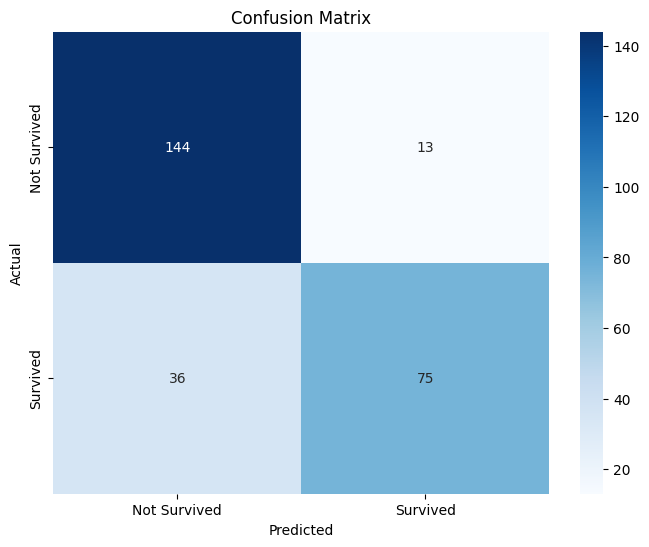

In [74]:
y_pred = model.predict(x_test_scale)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

#Report classification
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

#Confusion matrix
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

#Ploting confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
